# Analysing Covid-19 Geospatial data with Python

In [2]:
from datetime import datetime 
import pandas as pd
import numpy as np
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

## Reading Data

In [4]:
url = "https://proxy.hxlstandard.org/data/e2bb4b/download/jrc-covid-19-regions-hxl.csv"
df = pd.read_csv("jrc-covid-19-regions-hxl.csv")
df.head()

<ipython-input-4-5cd47f5d44a0>:2: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("jrc-covid-19-regions-hxl.csv")


,Date,iso3,CountryName,Region,lat,lon,CumulativePositive,CumulativeDeceased,CumulativeRecovered,CurrentlyPositive,Hospitalized,IntensiveCare,EUcountry,EUCPMcountry,NUTS
0,#date,#country+code+iso3,#country+name,#adm1+name,#geo+lat,#geo+lon,#affected+positive+total,#affected+dead+total,#affected+recovered+total,#affected+positive,#affected+hospitalized,#affected+intensive_care,#indicator+eu,#indicator+eucpm,NaN
1,2020-01-22,GRC,Greece,NOT SPECIFIED,NaN,NaN,0,0,0,0,NaN,NaN,TRUE,TRUE,NaN
2,2020-01-22,ISL,Iceland,NOT SPECIFIED,NaN,NaN,0,0,0,0,NaN,NaN,FALSE,TRUE,NaN
3,2020-01-22,LIE,Liechtenstein,Liechtenstein,47.164696,9.555,0,0,0,0,NaN,NaN,FALSE,FALSE,LI
4,2020-01-22,MCO,Monaco,Monaco,43.738348,7.424451,0,0,0,0,NaN,NaN,FALSE,FALSE,MC


In [5]:
df.dtypes

Date                   object
iso3                   object
CountryName            object
Region                 object
lat                    object
lon                    object
CumulativePositive     object
CumulativeDeceased     object
CumulativeRecovered    object
CurrentlyPositive      object
Hospitalized           object
IntensiveCare          object
EUcountry              object
EUCPMcountry           object
NUTS                   object
dtype: object

In [9]:
dtype = {'Date':object,
'iso3':object,
'CountryName':object,
'Region':object,
'lat':float,
'lon':float,
'CumulativePositive':float,
'CumulativeDeceased':float,
'CumulativeRecovered':float,
'CurrentlyPositive':float,
'Hospitalized':float,
'IntensiveCare':float,
'EUcountry':bool,
'EUCPMcountry':bool,
'NUTS':object}
df = pd.read_csv("jrc-covid-19-regions-hxl.csv", dtype=dtype, skiprows=range(1,2))
df.head()

,Date,iso3,CountryName,Region,lat,lon,CumulativePositive,CumulativeDeceased,CumulativeRecovered,CurrentlyPositive,Hospitalized,IntensiveCare,EUcountry,EUCPMcountry,NUTS
0,2020-01-22,GRC,Greece,NOT SPECIFIED,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,True,True,NaN
1,2020-01-22,ISL,Iceland,NOT SPECIFIED,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,False,True,NaN
2,2020-01-22,LIE,Liechtenstein,Liechtenstein,47.164696,9.555000,0.0,0.0,0.0,0.0,NaN,NaN,False,False,LI
3,2020-01-22,MCO,Monaco,Monaco,43.738348,7.424451,0.0,0.0,0.0,0.0,NaN,NaN,False,False,MC
4,2020-01-22,MKD,North Macedonia,North Macedonia,41.611000,21.751417,0.0,0.0,0.0,0.0,NaN,NaN,False,True,MK


In [11]:
df.shape

(134620, 15)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134620 entries, 0 to 134619
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Date                 134620 non-null  object 
 1   iso3                 134620 non-null  object 
 2   CountryName          134620 non-null  object 
 3   Region               134620 non-null  object 
 4   lat                  125839 non-null  float64
 5   lon                  125839 non-null  float64
 6   CumulativePositive   133475 non-null  float64
 7   CumulativeDeceased   107230 non-null  float64
 8   CumulativeRecovered  90577 non-null   float64
 9   CurrentlyPositive    134338 non-null  float64
 10  Hospitalized         61078 non-null   float64
 11  IntensiveCare        58272 non-null   float64
 12  EUcountry            134620 non-null  bool   
 13  EUCPMcountry         134620 non-null  bool   
 14  NUTS                 127495 non-null  object 
dtypes: bool(2), float

In [13]:
df.Date.max(), df.Date.min()

('2021-01-31', '2020-01-22')

## Geodataframe

In [15]:
df.dropna(axis=0, subset=["lat","lon"], inplace=True)

In [16]:
crs = "EPSG: 4326"

In [17]:
gdf= gpd.GeoDataFrame(df, crs=crs, geometry = gpd.points_from_xy(df.lon, df.lat))
gdf.head()

,Date,iso3,CountryName,Region,lat,lon,CumulativePositive,CumulativeDeceased,CumulativeRecovered,CurrentlyPositive,Hospitalized,IntensiveCare,EUcountry,EUCPMcountry,NUTS,geometry
2,2020-01-22,LIE,Liechtenstein,Liechtenstein,47.164696,9.555000,0.0,0.0,0.0,0.0,NaN,NaN,False,False,LI,POINT (9.55500 47.16470)
3,2020-01-22,MCO,Monaco,Monaco,43.738348,7.424451,0.0,0.0,0.0,0.0,NaN,NaN,False,False,MC,POINT (7.42445 43.73835)
4,2020-01-22,MKD,North Macedonia,North Macedonia,41.611000,21.751417,0.0,0.0,0.0,0.0,NaN,NaN,False,True,MK,POINT (21.75142 41.61100)
5,2020-01-22,SMR,San Marino,San Marino,43.942973,12.460035,0.0,0.0,0.0,0.0,NaN,NaN,False,False,SM,POINT (12.46003 43.94297)
6,2020-01-22,SRB,Serbia,Serbia,44.206802,20.911009,0.0,0.0,0.0,0.0,NaN,NaN,False,True,NaN,POINT (20.91101 44.20680)


<AxesSubplot:>

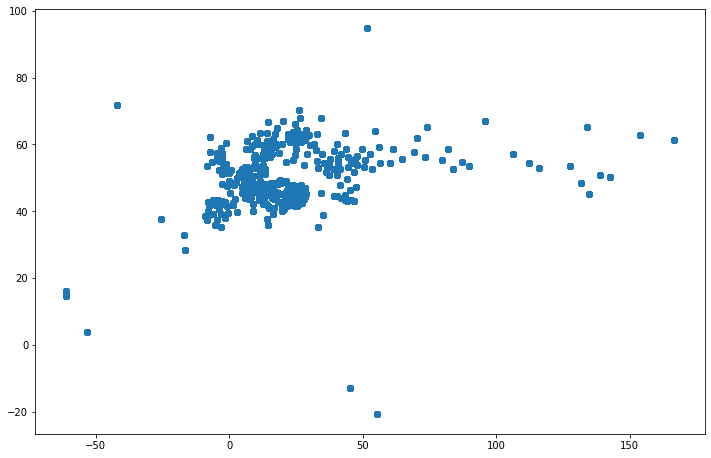

In [19]:
gdf.plot(figsize=(12,10))

,Date,iso3,CountryName,Region,lat,lon,CumulativePositive,CumulativeDeceased,CumulativeRecovered,CurrentlyPositive,Hospitalized,IntensiveCare,EUcountry,EUCPMcountry,NUTS,geometry
6726,2020-03-30,ALB,Albania,Berat,40.628500,20.090775,1.0,0.0,0.0,1.0,0.0,0.0,False,False,AL031,POINT (20.09078 40.62850)
6727,2020-03-30,ALB,Albania,Durrës,41.518365,19.651766,19.0,1.0,0.0,18.0,0.0,0.0,False,False,AL012,POINT (19.65177 41.51837)
6728,2020-03-30,ALB,Albania,Elbasan,41.040028,20.186454,5.0,0.0,0.0,5.0,0.0,0.0,False,False,AL021,POINT (20.18645 41.04003)
6729,2020-03-30,ALB,Albania,Fier,40.774633,19.620528,27.0,2.0,0.0,25.0,0.0,0.0,False,False,AL032,POINT (19.62053 40.77463)
6730,2020-03-30,ALB,Albania,Korçë,40.628830,20.666004,14.0,0.0,0.0,14.0,0.0,0.0,False,False,AL034,POINT (20.66600 40.62883)


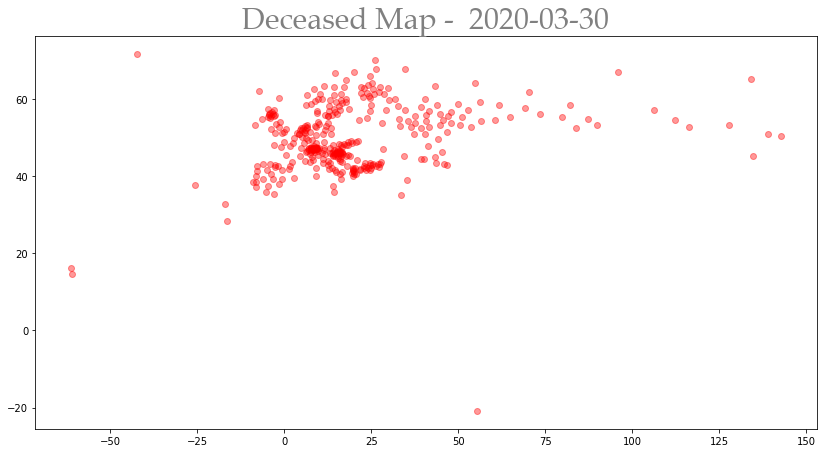

## Plotting Maps 

In [25]:
ctx.providers.keys()

dict_keys(['OpenStreetMap', 'MapTilesAPI', 'OpenSeaMap', 'OPNVKarte', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Stadia', 'Thunderforest', 'CyclOSM', 'Jawg', 'MapBox', 'MapTiler', 'Stamen', 'TomTom', 'Esri', 'OpenWeatherMap', 'HERE', 'HEREv3', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'GeoportailFrance', 'OneMapSG', 'USGS', 'WaymarkedTrails', 'OpenAIP', 'OpenSnowMap', 'AzureMaps', 'SwissFederalGeoportal', 'Gaode', 'Strava', 'OrdnanceSurvey'])

In [30]:
ctx.providers.Stamen.keys()

dict_keys(['Toner', 'TonerBackground', 'TonerHybrid', 'TonerLines', 'TonerLabels', 'TonerLite', 'Watercolor', 'Terrain', 'TerrainBackground', 'TerrainLabels', 'TopOSMRelief', 'TopOSMFeatures'])

(-2074473.7097805582, 3017067.935848897, 3045324.8841215693, 8334014.271479365)

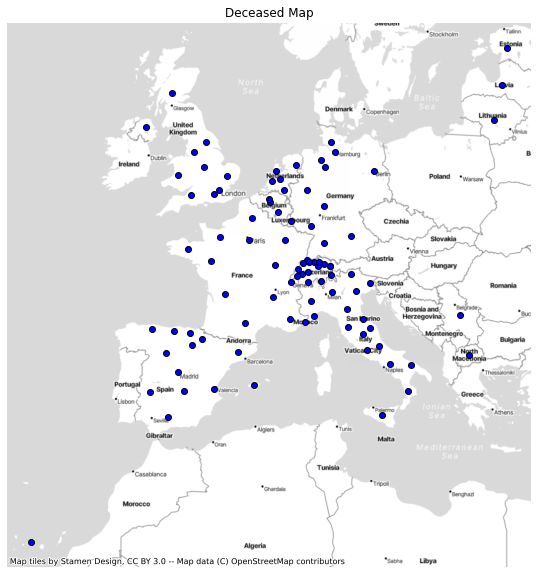

In [33]:
fig, ax = plt.subplots(figsize=(12,10))
gdf[gdf["Date"]=='2020-03-02'].to_crs(epsg=3857).plot(ax=ax, color="blue", edgecolor='Black')
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
plt.title('Deceased Map')
plt.axis("off")

In [35]:
#Creating bubble plots to show cumulativedeceased

(-7956130.721971631,
 17020917.154923566,
 -3080128.9077440216,
 12348101.084104426)

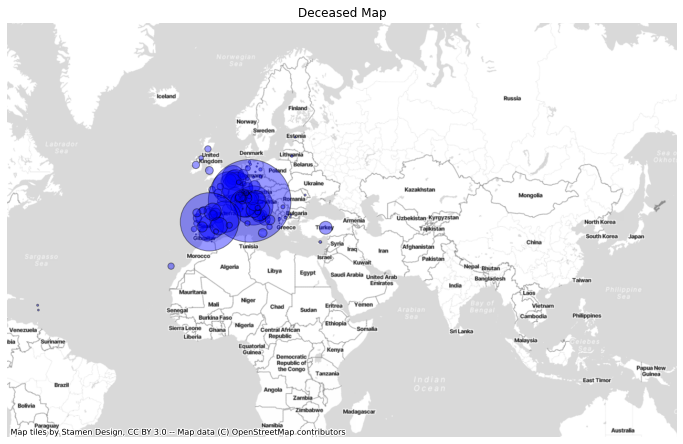

In [37]:
fig, ax = plt.subplots(figsize=(12,10))
gdf[gdf["Date"]=='2020-03-30'].to_crs(epsg=3857).plot(markersize='CumulativeDeceased', alpha=0.4, ax=ax, color="blue", edgecolor='Black')
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
plt.title('Deceased Map')
plt.axis("off")

In [38]:
gdf['normalized_death']= ((gdf['CumulativeDeceased']-gdf['CumulativeDeceased'].min())/(gdf['CumulativeDeceased'].max()-gdf['CumulativeDeceased'].min()))

In [39]:
gdf.head()

,Date,iso3,CountryName,Region,lat,lon,CumulativePositive,CumulativeDeceased,CumulativeRecovered,CurrentlyPositive,Hospitalized,IntensiveCare,EUcountry,EUCPMcountry,NUTS,geometry,normalized_death
2,2020-01-22,LIE,Liechtenstein,Liechtenstein,47.164696,9.555000,0.0,0.0,0.0,0.0,NaN,NaN,False,False,LI,POINT (9.55500 47.16470),0.0
3,2020-01-22,MCO,Monaco,Monaco,43.738348,7.424451,0.0,0.0,0.0,0.0,NaN,NaN,False,False,MC,POINT (7.42445 43.73835),0.0
4,2020-01-22,MKD,North Macedonia,North Macedonia,41.611000,21.751417,0.0,0.0,0.0,0.0,NaN,NaN,False,True,MK,POINT (21.75142 41.61100),0.0
5,2020-01-22,SMR,San Marino,San Marino,43.942973,12.460035,0.0,0.0,0.0,0.0,NaN,NaN,False,False,SM,POINT (12.46003 43.94297),0.0
6,2020-01-22,SRB,Serbia,Serbia,44.206802,20.911009,0.0,0.0,0.0,0.0,NaN,NaN,False,True,NaN,POINT (20.91101 44.20680),0.0


(-8090190.942396399,
 19836181.783843666,
 -3017256.256721209,
 11027775.412625361)

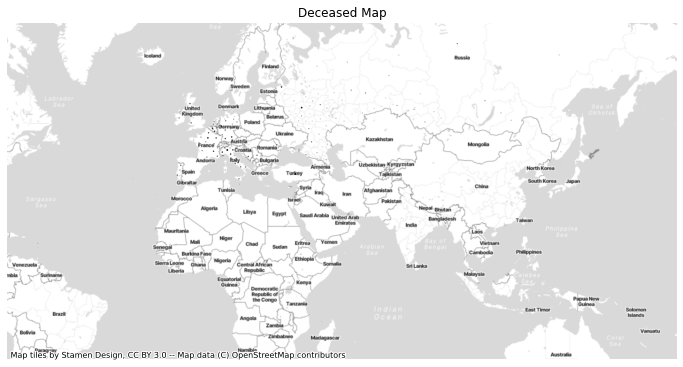

In [43]:
fig, ax = plt.subplots(figsize=(12,10))
gdf[gdf["Date"]=='2021-01-10'].to_crs(epsg=3857).plot(markersize='normalized_death', alpha=0.9, ax=ax, color="Red", edgecolor='Black')
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
plt.title('Deceased Map')
plt.axis("off")

## Join & Merge

In [48]:
eul_lvl2 = gpd.read_file(r'C:\Users\salan\NUTS_RG_01M_2021_4326_LEVL_2.geojson')

In [50]:
eul_lvl2.head()

,id,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,FRB0,FRB0,2,FR,Centre — Val de Loire,Centre — Val de Loire,0,NaN,NaN,FRB0,"POLYGON ((1.50153 48.94105, 1.51118 48.93461, ..."
1,CZ04,CZ04,2,CZ,Severozápad,Severozápad,0,NaN,NaN,CZ04,"POLYGON ((14.49122 51.04353, 14.49945 51.04610..."
2,CZ07,CZ07,2,CZ,Střední Morava,Střední Morava,0,NaN,NaN,CZ07,"POLYGON ((16.90792 50.44945, 16.92475 50.43939..."
3,DK02,DK02,2,DK,Sjælland,Sjælland,0,NaN,NaN,DK02,"MULTIPOLYGON (((11.77939 55.65903, 11.78305 55..."
4,ES12,ES12,2,ES,Principado de Asturias,Principado de Asturias,0,NaN,NaN,ES12,"MULTIPOLYGON (((-4.51230 43.39320, -4.51142 43..."


<AxesSubplot:>

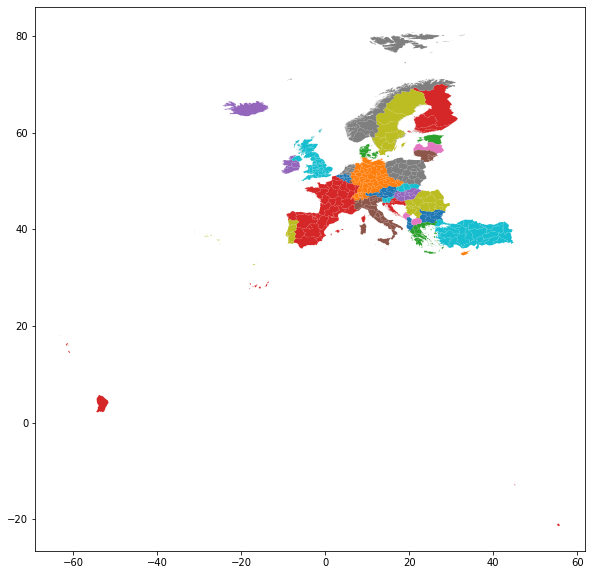

In [53]:
eul_lvl2.plot("CNTR_CODE", figsize=(12,10))

In [54]:
sjoined = gpd.sjoin(gdf,eul_lvl2, op='within')
sjoined.head()


c:\programdata\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,Date,iso3,CountryName,Region,lat,lon,CumulativePositive,CumulativeDeceased,CumulativeRecovered,CurrentlyPositive,...,id,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID
2,2020-01-22,LIE,Liechtenstein,Liechtenstein,47.164696,9.555,0.0,0.0,0.0,0.0,...,LI00,LI00,2,LI,Liechtenstein,Liechtenstein,0,NaN,NaN,LI00
9,2020-01-23,LIE,Liechtenstein,Liechtenstein,47.164696,9.555,0.0,0.0,0.0,0.0,...,LI00,LI00,2,LI,Liechtenstein,Liechtenstein,0,NaN,NaN,LI00
18,2020-01-24,LIE,Liechtenstein,Liechtenstein,47.164696,9.555,0.0,0.0,0.0,0.0,...,LI00,LI00,2,LI,Liechtenstein,Liechtenstein,0,NaN,NaN,LI00
28,2020-01-25,LIE,Liechtenstein,Liechtenstein,47.164696,9.555,0.0,0.0,0.0,0.0,...,LI00,LI00,2,LI,Liechtenstein,Liechtenstein,0,NaN,NaN,LI00
38,2020-01-26,LIE,Liechtenstein,Liechtenstein,47.164696,9.555,0.0,0.0,0.0,0.0,...,LI00,LI00,2,LI,Liechtenstein,Liechtenstein,0,NaN,NaN,LI00


In [55]:
sjoined_to_merge = sjoined[['Date','CumulativePositive','CumulativeDeceased','CumulativeRecovered','NUTS_ID']]
merged_gdf=pd.merge(eul_lvl2,sjoined_to_merge[sjoined_to_merge['Date']=='2021-01-06'], on='NUTS_ID',how='inner')
merged_gdf

,id,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry,Date,CumulativePositive,CumulativeDeceased,CumulativeRecovered
0,FRB0,FRB0,2,FR,Centre — Val de Loire,Centre — Val de Loire,0,NaN,NaN,FRB0,"POLYGON ((1.50153 48.94105, 1.51118 48.93461, ...",2021-01-06,0.0,1375.0,5650.0
1,DK02,DK02,2,DK,Sjælland,Sjælland,0,NaN,NaN,DK02,"MULTIPOLYGON (((11.77939 55.65903, 11.78305 55...",2021-01-06,NaN,NaN,NaN
2,AL01,AL01,2,AL,Veri,Veri,0,NaN,NaN,AL01,"POLYGON ((19.83100 42.46645, 19.83568 42.47103...",2021-01-06,4817.0,127.0,3487.0
3,AL01,AL01,2,AL,Veri,Veri,0,NaN,NaN,AL01,"POLYGON ((19.83100 42.46645, 19.83568 42.47103...",2021-01-06,1423.0,26.0,999.0
4,AL01,AL01,2,AL,Veri,Veri,0,NaN,NaN,AL01,"POLYGON ((19.83100 42.46645, 19.83568 42.47103...",2021-01-06,2895.0,50.0,1903.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,NO09,NO09,2,NO,Agder og Sør-Østlandet,Agder og Sør-Østlandet,0,0.0,0.0,NO09,"MULTIPOLYGON (((10.38433 59.53421, 10.37888 59...",2021-01-06,2435.0,NaN,NaN
307,NO0A,NO0A,2,NO,Vestlandet,Vestlandet,0,0.0,0.0,NO0A,"MULTIPOLYGON (((9.06206 62.37261, 9.01855 62.3...",2021-01-06,984.0,NaN,NaN
308,NO0A,NO0A,2,NO,Vestlandet,Vestlandet,0,0.0,0.0,NO0A,"MULTIPOLYGON (((9.06206 62.37261, 9.01855 62.3...",2021-01-06,2606.0,NaN,NaN
309,NO0A,NO0A,2,NO,Vestlandet,Vestlandet,0,0.0,0.0,NO0A,"MULTIPOLYGON (((9.06206 62.37261, 9.01855 62.3...",2021-01-06,5734.0,NaN,NaN


<AxesSubplot:>

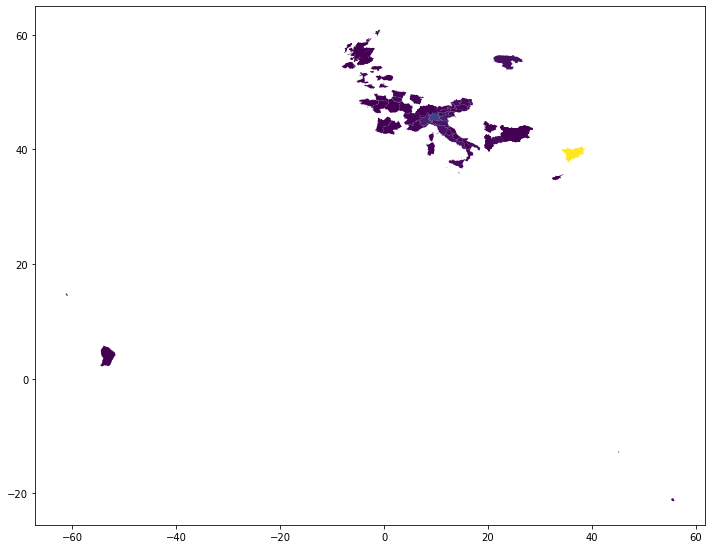

In [56]:
merged_gdf.plot("CumulativeRecovered", figsize=(12,10))

## Choropleth Map

In [58]:
population = pd.read_csv('population_data.csv')
population.head()

,codes,labels,2019
0,BE,Belgium,11455519
1,BE1,Région de Bruxelles-Capitale/Brussels Hoofdste...,1215290
2,BE10,Région de Bruxelles-Capitale/Brussels Hoofdste...,1215290
3,BE2,Vlaams Gewest,6596233
4,BE21,Prov. Antwerpen,1860470


In [59]:
merged_gdf.head()

,id,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry,Date,CumulativePositive,CumulativeDeceased,CumulativeRecovered
0,FRB0,FRB0,2,FR,Centre — Val de Loire,Centre — Val de Loire,0,NaN,NaN,FRB0,"POLYGON ((1.50153 48.94105, 1.51118 48.93461, ...",2021-01-06,0.0,1375.0,5650.0
1,DK02,DK02,2,DK,Sjælland,Sjælland,0,NaN,NaN,DK02,"MULTIPOLYGON (((11.77939 55.65903, 11.78305 55...",2021-01-06,NaN,NaN,NaN
2,AL01,AL01,2,AL,Veri,Veri,0,NaN,NaN,AL01,"POLYGON ((19.83100 42.46645, 19.83568 42.47103...",2021-01-06,4817.0,127.0,3487.0
3,AL01,AL01,2,AL,Veri,Veri,0,NaN,NaN,AL01,"POLYGON ((19.83100 42.46645, 19.83568 42.47103...",2021-01-06,1423.0,26.0,999.0
4,AL01,AL01,2,AL,Veri,Veri,0,NaN,NaN,AL01,"POLYGON ((19.83100 42.46645, 19.83568 42.47103...",2021-01-06,2895.0,50.0,1903.0


In [60]:
merged_population=merged_gdf.merge(population,left_on='NUTS_ID', right_on='codes',how='left')
merged_population['CumulativeDeceased']=merged_population['CumulativeDeceased'].fillna(0)
merged_population['normalized_Deceased']=(merged_population['CumulativeDeceased']/merged_population['2019'].astype('float'))*100


In [61]:
merged_population.shape

(311, 19)

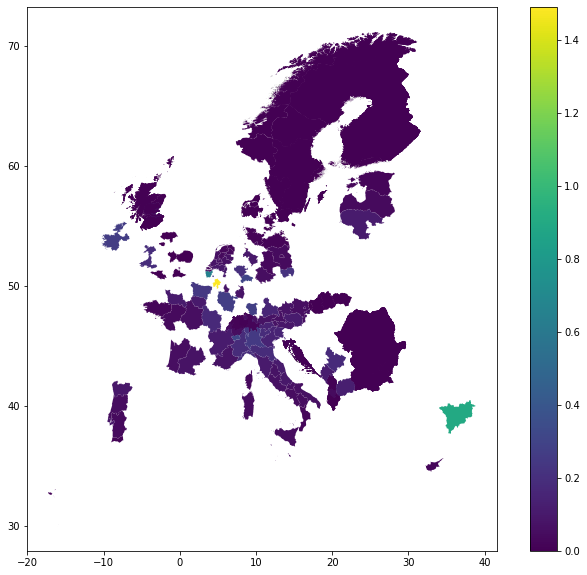

In [62]:
merged_population.cx[-20:60, 30:70].plot("normalized_Deceased", legend=True, figsize=(12,10));